### 如何安装jieba：https://pypi.python.org/pypi/jieba/ ###

In [75]:
import pandas as pd
import numpy as np
import os
import jieba #需要先安装jieba库

In [54]:
os.chdir('/Users/a1/Desktop/算法实战/贝叶斯_新闻分类/贝叶斯-新闻分类/data')

### 1）导入数据&处理包

In [55]:
#这里使用的是pd.read_table: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
df_news = pd.read_table('val.txt', names=['category', 'theme', 'URL', 'content'], encoding = 'utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [56]:
#df_newss = pd.read_table('val.txt')
#df_newss 

In [57]:
df_news.shape #看一下表格大概结构

(5000, 4)

### 2）使用jieba对每一条content内容分词操作，存入list

In [58]:
content = df_news.content.values.tolist() #在pandas中拿某一列的值，并把它转化为list格式
print(content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [59]:
#【进行分词操作】
content_S = []
for line in content: #对每一个content中内容循环，分词操作
    current_segment = jieba.lcut(line) #使用jieba.lcut()命令进行分词
    if len(current_segment) > 1 and current_segment != '\r\r': #挑出content中长度大于1，且不是分隔符的字符
        content_S.append(current_segment) 

In [60]:
content_S[1000] #查看分词结果

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

### 3）把分词后content的list，创建对应的dataframe

In [61]:
df_content = pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


### 4) 开始清洗：先去除停用词

In [62]:
#os.chdir('/Users/a1/Desktop/算法实战/贝叶斯_新闻分类/贝叶斯-新闻分类/')

In [63]:
# 取出停用词表
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [64]:
type(stopwords)
type(df_content)

pandas.core.frame.DataFrame

In [65]:
#定义一个函数，输入：list格式的文档与停用词表， 输出：去除停用词的文档，与去除的文档词
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

### 5) 清洗完成第一步，去除了contents中在停词表出现过的词汇

In [67]:
df_content = pd.DataFrame({'contents_clean' : contents_clean}) #把处理完成的list，改成字典格式，传入DataFrame格式
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [68]:
df_all_words = pd.DataFrame({'all_words':all_words}) #把处理完成的所有的all_words打印出来
df_all_words

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ
5,憬
6,杭州
7,滨江区
8,江陵
9,路


### 6）计算词频，挑出出现次数最多的那几个词

In [69]:
#计算词频groupby: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
import numpy
words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count = words_count.reset_index().sort_values(by=["count"], ascending = False)
words_count.head()

/Users/a1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


### 7) 使用词云wordcloud展示

In [81]:
#使用词云
from wordcloud import WordCloud #导入安装的词云库
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib


In [82]:
#https://matplotlib.org/users/customizing.html
matplotlib.rcParams['figure.figsize'] = [10.0, 8.0]

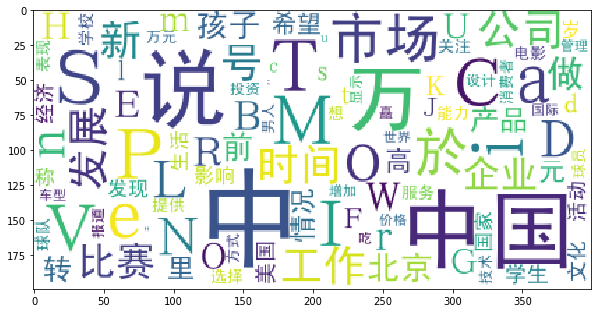

In [83]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color = "white", max_font_size = 80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}  #前100个词，画出来
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### 8) 使用TF-IDF 提取关键字

In [84]:
import jieba.analyse

In [85]:
#打印未清洗数据
index = 2400
print(df_news['content'][index])

法国ＶＳ西班牙、里贝里ＶＳ哈维，北京时间６月２４日凌晨一场的大战举世瞩目，而这场胜利不仅仅关乎两支顶级强队的命运，同时也是他们背后的球衣赞助商耐克和阿迪达斯之间的一次角逐。Ｔ谌胙”窘炫分薇的１６支球队之中，阿迪达斯和耐克的势力范围也是几乎旗鼓相当：其中有５家球衣由耐克提供，而阿迪达斯则赞助了６家，此外茵宝有３家，而剩下的两家则由彪马赞助。而当比赛进行到现在，率先挺进四强的两支球队分别被耐克支持的葡萄牙和阿迪达斯支持的德国占据，而由于最后一场１／４决赛是茵宝（英格兰）和彪马（意大利）的对决，这也意味着明天凌晨西班牙同法国这场阿迪达斯和耐克在１／４决赛的唯一一次直接交手将直接决定两家体育巨头在此次欧洲杯上的胜负。８据评估，在２０１２年足球商品的销售额能总共超过４０亿欧元，而单单是不足一个月的欧洲杯就有高达５亿的销售额，也就是说在欧洲杯期间将有７００万件球衣被抢购一空。根据市场评估，两大巨头阿迪达斯和耐克的市场占有率也是并驾齐驱，其中前者占据３８％，而后者占据３６％。体育权利顾问奥利弗－米歇尔在接受《队报》采访时说：“欧洲杯是耐克通过法国翻身的一个绝佳机会！”Ｃ仔尔接着谈到两大赞助商的经营策略：“竞技体育的成功会燃起球衣购买的热情，不过即便是水平相当，不同国家之间的欧洲杯效应却存在不同。在德国就很出色，大约１／４的德国人通过电视观看了比赛，而在西班牙效果则差很多，由于民族主义高涨的加泰罗尼亚地区只关注巴萨和巴萨的球衣，他们对西班牙国家队根本没什么兴趣。”因此尽管西班牙接连拿下欧洲杯和世界杯，但是阿迪达斯只为西班牙足协支付每年２６００万的赞助费＃相比之下尽管最近两届大赛表现糟糕法国足协将从耐克手中每年可以得到４０００万欧元。米歇尔解释道：“法国创纪录的４０００万欧元赞助费得益于阿迪达斯和耐克竞逐未来１５年欧洲市场的竞争。耐克需要笼络一个大国来打赢这场欧洲大陆的战争，而尽管德国拿到的赞助费并不太高，但是他们却显然牢牢掌握在民族品牌阿迪达斯手中。从长期投资来看，耐克给法国的赞助并不算过高。”


In [91]:
#打印清洗过后的数据
#使用jieba，连接起来，提取关键词
print(df_content['contents_clean'][index])
print("--------------------------------------------------")
content_S_str = "".join(contents_clean[index])
print(" ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))


['法国', 'Ｖ', 'Ｓ', '西班牙', '里', '贝里', 'Ｖ', 'Ｓ', '哈维', '北京', '时间', '凌晨', '一场', '大战', '举世瞩目', '这场', '胜利', '关乎', '两支', '顶级', '强队', '命运', '背后', '球衣', '赞助商', '耐克', '阿迪达斯', '之间', '角逐', 'Ｔ', '谌', '胙', '窘炫分', '薇', '支', '球队', '之中', '阿迪达斯', '耐克', '势力范围', '旗鼓相当', '家', '球衣', '耐克', '提供', '阿迪达斯', '赞助', '家', '茵宝', '家', '剩下', '两家', '彪马', '赞助', '比赛', '率先', '挺进', '四强', '两支', '球队', '耐克', '支持', '葡萄牙', '阿迪达斯', '支持', '德国', '占据', '一场', '决赛', '是茵宝', '英格兰', '彪马', '意大利', '对决', '意味着', '明天', '凌晨', '西班牙', '法国', '这场', '阿迪达斯', '耐克', '决赛', '唯一', '交手', '两家', '体育', '巨头', '欧洲杯', '胜负', '评估', '足球', '商品', '销售额', '总共', '超过', '亿', '欧元', '单单是', '一个月', '欧洲杯', '高达', '亿', '销售额', '欧洲杯', '期间', '万件', '球衣', '抢购一空', '市场', '评估', '两大', '巨头', '阿迪达斯', '耐克', '市场占有率', '并驾齐驱', '占据', '占据', '体育', '权利', '顾问', '奥利弗', '米歇尔', '接受', '队报', '采访', '时说', '欧洲杯', '耐克', '法国', '翻身', '绝佳', '机会', 'Ｃ', '仔尔', '谈到', '两大', '赞助商', '经营策略', '竞技', '体育', '成功', '燃起', '球衣', '购买', '热情', '水平', '国家', '之间', '欧洲杯', '效应', '德国', '出色', '德国人', '电视', '观看', '比赛', '西班牙', '效果', '差', 

### 9) LDA 主题模型
    格式要求：list of list 形式，分词好的整个语料
    找出文章中主题

In [108]:
#类似于无监督模型
#导入gensim库，自然语言处理，参考官网：https://radimrehurek.com/gensim/
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

In [109]:
#首先做映射表（字典），相当于词袋，
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [110]:
#使用gensim中的lda模型，可以参考：https://blog.csdn.net/angela2016/article/details/78208754
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己指定K值

In [111]:
#一号分类结果（一共分了20个主题）
#在一号中，找出前5个
print (lda.print_topic(1, topn=5))

0.007*"中国" + 0.006*"文化" + 0.006*"中" + 0.004*"Ｓ" + 0.004*"Ｍ"


In [112]:
# 20个主题中，排名前5个主题词
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.008*"中" + 0.004*"爆料" + 0.004*"卫视" + 0.003*"电影" + 0.003*"中国"
0.007*"中国" + 0.006*"文化" + 0.006*"中" + 0.004*"Ｓ" + 0.004*"Ｍ"
0.006*"中" + 0.003*"说" + 0.003*"恋情" + 0.003*"导演" + 0.003*"评委"
0.005*"中" + 0.003*"公司" + 0.003*"中国" + 0.003*"Ｔ" + 0.002*"航母"
0.006*"张绍" + 0.004*"乳房" + 0.003*"高考" + 0.003*"中" + 0.003*"Ｖ"
0.004*"中" + 0.003*"中国" + 0.002*"工作" + 0.002*"恋情" + 0.002*"比赛"
0.030*"ａ" + 0.030*"ｅ" + 0.021*"ｏ" + 0.021*"ｉ" + 0.020*"ｎ"
0.007*"万" + 0.007*"该剧" + 0.005*"号" + 0.003*"中" + 0.003*"男士"
0.006*"说" + 0.005*"中" + 0.003*"网友" + 0.002*"导演" + 0.002*"演员"
0.005*"中" + 0.004*"食物" + 0.003*"吃" + 0.003*"撒" + 0.003*"含有"
0.007*"男人" + 0.005*"孩子" + 0.005*"说" + 0.004*"爱" + 0.004*"女人"
0.008*"中国" + 0.005*"中" + 0.003*"说" + 0.003*"Ｓ" + 0.003*"Ｄ"
0.014*"电影" + 0.006*"导演" + 0.006*"中" + 0.006*"影片" + 0.004*"票房"
0.008*"中" + 0.007*"节目" + 0.005*"中国" + 0.003*"作品" + 0.002*"主持人"
0.012*"考生" + 0.004*"学生" + 0.004*"中" + 0.003*"官兵" + 0.003*"Ｍ"
0.006*"中" + 0.005*"比赛" + 0.004*"戏" + 0.003*"说" + 0.003*"拍摄"
0.004*"说" + 0.004*"学生" + 0.0

### 10）贝叶斯分类器对新闻数据进行分类

In [113]:
#课外学习“if __name__ == '__main__' ”，参考：http://blog.konghy.cn/2017/04/24/python-entry-program/
# 1）拿到数据，导入为DataFrame格式，带标签的
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",汽车
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",汽车
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",汽车
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",汽车
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",汽车
5,"[经销商, 电话, 试驾, 订车, 仕, 嗍, √, 焖, 市, 秦城区, 岷山, 路, 号...",汽车
6,"[经销商, 电话, 试驾, 订车, 愣省, 东莞市, 南, 城区, 莞太, 大道, 白马, ...",汽车
7,"[自主, 品牌, 崛起, 是从, 模仿, 世界, 老牌, 名车, 一件, 坏事, 这是, 一...",汽车
8,"[华泰, 推出, 自主, 轿车, Ｂ, 一款, 自主, Ｓ, Ｕ, Ｖ, 宝利格, 下旬, ...",汽车
9,"[爱美, 之心, 人皆有之, 汽车, 外观, 炫感度, 冲击力, 第一眼, 接触, 消费者,...",汽车


In [114]:
#2）找出多少种label
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [115]:
#3）因为sklearn不认识这些label，需要把这些label转换为数字，用字典来做映射
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
#把label进行替换 map()
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [116]:
#4）sklearn, 先进行数据切分，分为训练集与测试集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [117]:
#x_train = x_train.flatten()，
x_train[0][1]

'上海'

In [118]:
#5）把训练集中的list转换为string，注意输入格式，后续需要把每条content转换为对应的向量，通过sklearn中的向量构造器
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        #需要把list转换为string格式，可以用.join形式组合，并且用‘ ’空格取分开
        #join()用法参考：https://blog.csdn.net/weixin_40475396/article/details/78227747
        words.append(' '.join(x_train[line_index])) #words里面是训练数据
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [119]:
print (len(words))

3750


In [120]:
#先举例
from sklearn.feature_extraction.text import CountVectorizer
#我有4篇文章
#【格式要求】：这里输入为list，每篇文章用逗号分开，每篇文章里面用空格分开，不能写成字符串
texts=["dog cat fish","dog cat cat","fish bird", 'bird'] 
#向量构造器，实例化一个对象
cv = CountVectorizer()
#进行向量转换
cv_fit=cv.fit_transform(texts)

#现在语料库中不重复的词有几个，一共是4中
print(cv.get_feature_names())
#打印转换好的向量，解释第一行：‘bird’单词在第一篇文章中出现0次，所以第一个值为0，‘cat’出现一次，所以为1，以此类推
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [121]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
#注意这里有 ngram_range ，可以让词组合，让种类更多更复杂，向量从原来的4维转为了9维，当然也别太多
#通常为ngram 为 2就行
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [122]:
# 6）构造向量，有了上面的words的标准格式的内容，开始构建特征向量
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
#fit一下
vec.fit(words)



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [123]:
# 7） 导入在sklearn中，把beyes拿出来，有输入特征，还有label值
from sklearn.naive_bayes import MultinomialNB
#实例化分类器对象
classifier = MultinomialNB()
#把words向量传入classifier
classifier.fit(vec.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
# 8）测试集同样的3步处理操作：内容转换为string，空格分开 --- 把内容转换为特征向量 ---- 导入贝叶斯模型传入（输入特征向量与label值）
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [125]:
#9) 基于词频向量的，进行贝叶斯，结果
classifier.score(vec.transform(test_words), y_test)

0.804

In [126]:
# 10) 另一种构造向量的方式，不采用词频，采用TF-IDF模式构造向量，发现最后结果稍好一些
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [127]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [128]:
#11）执行当前的结果，贝叶斯分类器的精度
classifier.score(vectorizer.transform(test_words), y_test)

0.8152